In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data
data = np.load("../training_data/ZF270g/train/training_data_ZF270g_1.npz")

In [3]:
# get the files
data.files

['X_train',
 'y_train',
 'weight_maps_train',
 'ratio_cell_train',
 'X_val',
 'y_val',
 'weight_maps_val',
 'ratio_cell_val']

In [4]:
# readout the files
X_train = data['X_train']
y_train = data['y_train']
weight_maps_train = data['weight_maps_train']
ratio_cell_train = data['ratio_cell_train']
X_val = data['X_val']
y_val = data['y_val']
weight_maps_val = data['weight_maps_val']
ratio_cell_val = data['ratio_cell_val']

Training weights 1.0


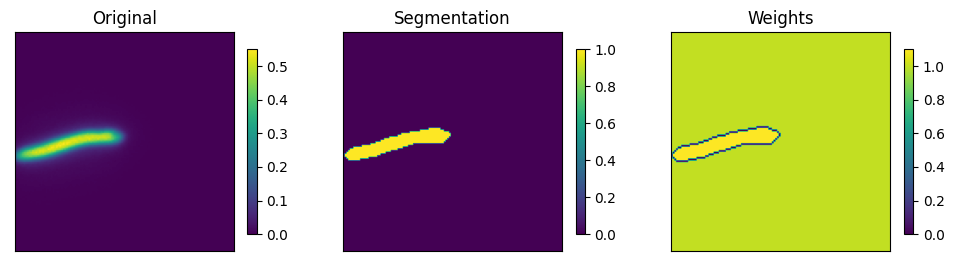

In [5]:
# visualize X_train and y_train
n = 32

print(f"Training weights {ratio_cell_train[n]}")

fig, axes = plt.subplots(1,3)
fig.set_size_inches((12,8))

# Original image
im0 = axes[0].imshow(X_train[n])
axes[0].set_title("Original")
axes[0].set_xticks([])
axes[0].set_yticks([])
cbar = fig.colorbar(im0, ax=axes[0], shrink=0.3)


# Segmentation
im1 = axes[1].imshow(y_train[n])
axes[1].set_title("Segmentation")
axes[1].set_xticks([])
axes[1].set_yticks([])
cbar = fig.colorbar(im1, ax=axes[1], shrink=0.3)

im2 = axes[2].imshow(weight_maps_train[n])
axes[2].set_title("Weights")
axes[2].set_xticks([])
axes[2].set_yticks([])
cbar = fig.colorbar(im2, ax=axes[2], shrink=0.3)
